# ใครรอดชีวิตจากเหตุการณ์เรือไททานิค?

**Credit:** http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets

* **pclass:** Passenger class (1 = first, 2 = second, 3 = third)
* **survived:** Survival (0 = no, 1 = yes)
* **name:** Name
* **sex:** Sex
* **age:** Age
* **sibsp:** Number of siblings/spouses aboard
* **parch:** Number of parents/chilren aboard
* **ticket:** Ticket number
* **fare:** Passenger fare
* **cabin:** Cabin
* **embarked:** Port of embarkation
* **boat:** Lifeboat
* **body:** Body identification number
* **home.dest:** Home/Destination

In [68]:
import pandas as pd

In [69]:
titanic_df = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')

In [70]:
titanic_df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [71]:
titanic_df.shape

(1309, 14)

In [72]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [73]:
titanic_df.describe()

C:\Users\Praiyaur\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
50%,3.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
75%,3.000000,1.000000,NaN,1.000000,0.000000,NaN,NaN
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### เปอร์เซนต์ของผู้โดยสารที่รอดชีวิตจากเรือไททานิคเป็นเท่าไหร่?

In [74]:
titanic_df['survived'].mean()

0.3819709702062643

### ผู้โดยสารคลาสไหนรอดชีวิตเยอะสุด?

In [75]:
titanic_df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159930,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


### ในแต่ละคลาสผู้โดยสารที่เป็นชายรอดเท่าไหร่ และที่เป็นหญิงรอดเท่าไหร่?

In [76]:
titanic_df.groupby(['pclass', 'sex']).mean()

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029272  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499223  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815380  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185329  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962264  0.470588  0.255578   12.415462  151.854167

### ลองนำข้อมูลมาพล็อต

In [77]:
%matplotlib inline

In [78]:
titanic_df.age.max()

80.0

In [79]:
titanic_df.age.min()

0.17000000000000001

In [80]:
cut = pd.cut(titanic_df.age, [10, 20, 30, 40, 50, 60, 70, 80])
cut.head(10)

0    (20, 30]
1         NaN
2         NaN
3    (20, 30]
4    (20, 30]
5    (40, 50]
6    (60, 70]
7    (30, 40]
8    (50, 60]
9    (70, 80]
Name: age, dtype: category
Categories (7, object): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

In [81]:
titanic_df.groupby(cut).mean()

,pclass,survived,age,sibsp,parch,fare,body
age,,,,,,,
"(10, 20]",2.524691,0.395062,17.283951,0.611111,0.395062,28.807050,159.307692
"(20, 30]",2.371191,0.371191,25.324100,0.326870,0.218837,28.159013,170.393939
"(30, 40]",2.109524,0.423810,35.121429,0.361905,0.414286,42.701507,155.343750
"(40, 50]",1.787879,0.393939,45.367424,0.378788,0.409091,47.254231,151.909091
"(50, 60]",1.387097,0.483871,55.185484,0.419355,0.370968,61.943347,159.777778
"(60, 70]",1.518519,0.222222,63.537037,0.333333,0.444444,66.131250,207.875000
"(70, 80]",1.666667,0.333333,73.750000,0.166667,0.000000,34.755567,96.500000


In [84]:
avg_data_by_age = titanic_df.groupby(cut).mean()

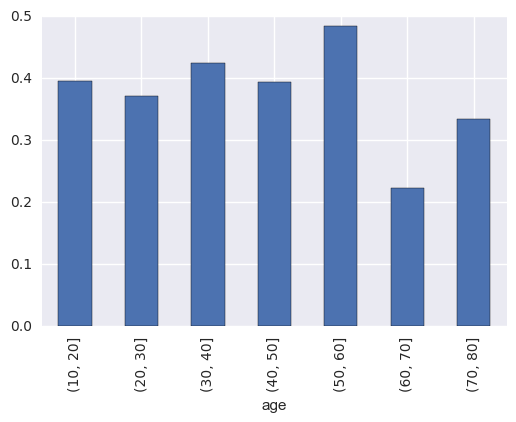

In [85]:
avg_data_by_age.survived.plot(kind='bar')

In [86]:
import seaborn as sns

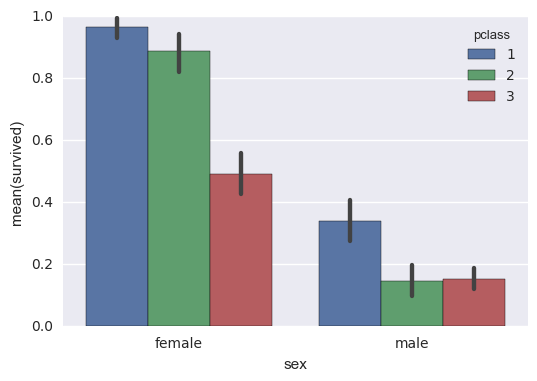

In [87]:
sns.barplot(x="sex", y="survived", hue="pclass", data=titanic_df)

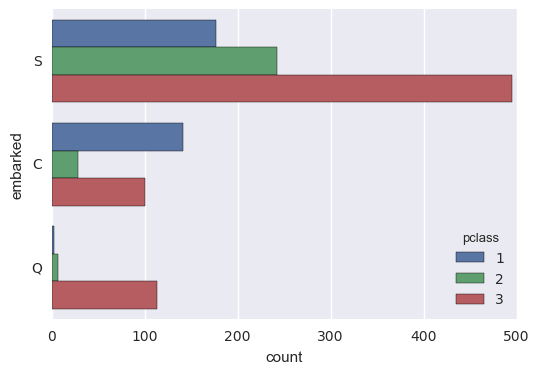

In [88]:
sns.countplot(y="embarked", hue="pclass", data=titanic_df);

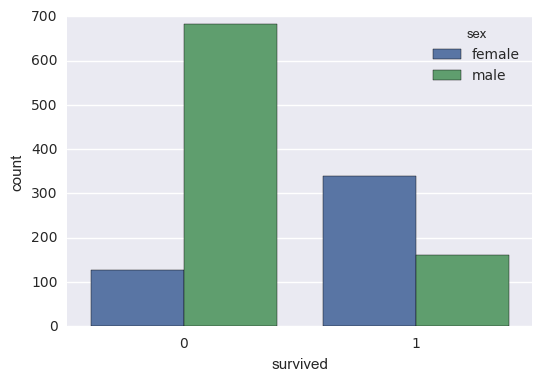

In [89]:
sns.countplot(x=titanic_df.survived, hue=titanic_df.sex)

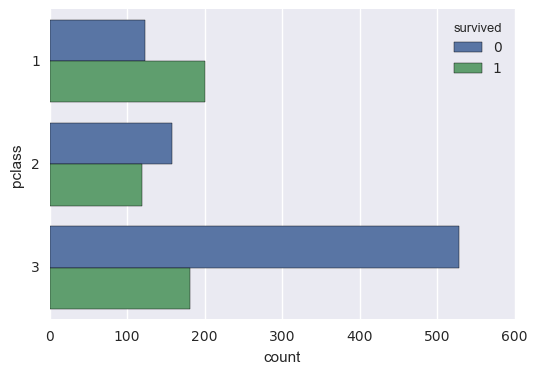

In [90]:
sns.countplot(y=titanic_df.pclass, hue=titanic_df.survived)

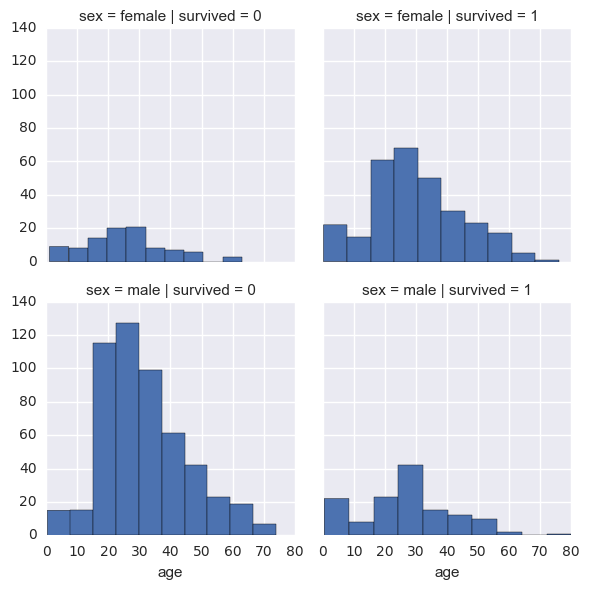

In [91]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(titanic_df, row="sex", col="survived")
g.map(plt.hist, 'age')

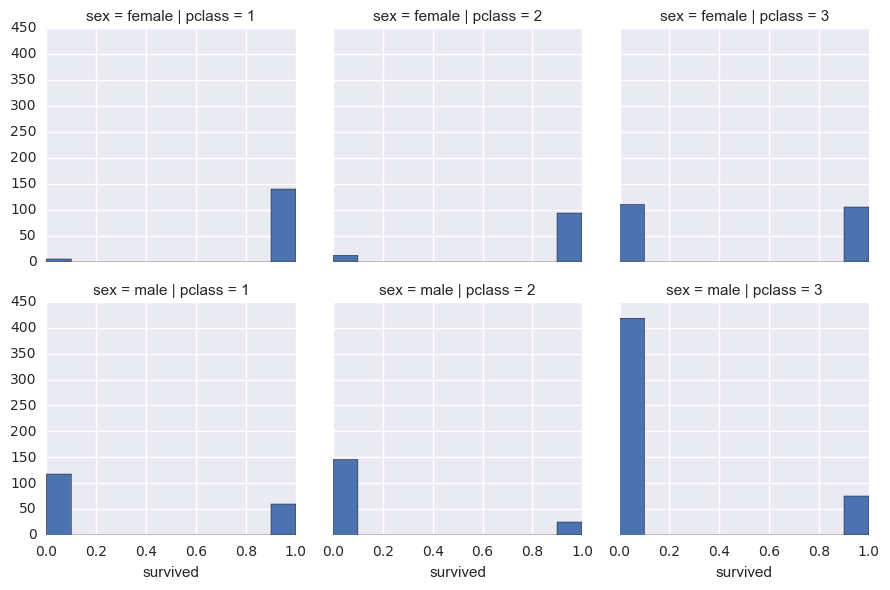

In [92]:
g = sns.FacetGrid(titanic_df, row="sex", col="pclass")
g.map(plt.hist, 'survived')

## เตรียมข้อมูลสำหรับสร้างโมเดล

In [93]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [94]:
titanic_df.dropna(how='any').shape

(0, 14)

In [95]:
titanic_df.drop(['boat', 'body', 'cabin', 'home.dest'], axis=1).dropna(how='any').shape

(1043, 10)

In [96]:
titanic_df.drop(['boat', 'body', 'cabin', 'home.dest'], axis=1).dropna(how='any').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1043 non-null int64
survived    1043 non-null int64
name        1043 non-null object
sex         1043 non-null object
age         1043 non-null float64
sibsp       1043 non-null int64
parch       1043 non-null int64
ticket      1043 non-null object
fare        1043 non-null float64
embarked    1043 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 89.6+ KB


In [97]:
titanic_df = titanic_df.drop(['name', 'ticket', 'boat', 'body', 'cabin', 'home.dest'], axis=1).dropna(how='any')

In [98]:
from sklearn import preprocessing

le_for_sex = preprocessing.LabelEncoder()
le_for_sex.fit(titanic_df.sex)
titanic_df.sex = le_for_sex.transform(titanic_df.sex)

le_for_embarked = preprocessing.LabelEncoder()
le_for_embarked.fit(titanic_df.embarked)
titanic_df.embarked = le_for_embarked.fit_transform(titanic_df.embarked)

In [99]:
le_for_sex.classes_

array(['female', 'male'], dtype=object)

In [100]:
le_for_embarked.classes_

array(['C', 'Q', 'S'], dtype=object)

In [101]:
le_for_sex.inverse_transform([0, 1, 1])

array(['female', 'male', 'male'], dtype=object)

In [102]:
le_for_embarked.inverse_transform([0, 1, 2, 2])

array(['C', 'Q', 'S', 'S'], dtype=object)

In [103]:
titanic_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.00,0,0,211.3375,2
1,1,1,1,0.92,1,2,151.5500,2
2,1,0,0,2.00,1,2,151.5500,2
3,1,0,1,30.00,1,2,151.5500,2
4,1,0,0,25.00,1,2,151.5500,2


In [104]:
X = titanic_df.drop(['survived'], axis=1).values
y = titanic_df['survived'].values

In [105]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [110]:
# import
from sklearn.tree import DecisionTreeClassifier

# instantiate
clf = DecisionTreeClassifier(max_depth=10)

# fit
clf.fit(X_train, y_train)

# predict
y_pred_class = clf.predict(X_test)

In [111]:
clf.score(X_test, y_test)

0.74712643678160917

In [112]:
from sklearn.cross_validation import cross_val_score

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print(scores.mean(), scores.std())

# you can easily change models, and the results may shift - here we are trying to get higher score

0.753275276503 0.106616269119


In [65]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
prit(scores.mean(), scores.std())

NameError: name 'cross_val_score' is not defined

## Classification Metrics

In [ ]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.classification_report(y_test, y_pred_class, target_names=['no', 'yes']))

## Cross-Validation with Different Models

In [ ]:
from sklearn.cross_validation import cross_val_score

dt = DecisionTreeClassifier(max_depth=10)
scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print(scores.mean(), scores.std())

In [ ]:
from sklearn.svm import SVC

svc = SVC()
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores.mean(), scores.std())

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print(scores.mean(), scores.std())

In [ ]:
import sklearn.ensemble as ske

In [ ]:
rf = ske.RandomForestClassifier(n_estimators=50)
scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print(scores.mean(), scores.std())

In [ ]:
gb = ske.GradientBoostingClassifier(n_estimators=50)
scores = cross_val_score(gb, X, y, cv=10, scoring='accuracy')
print(scores.mean(), scores.std())